Tabla de contingencia de la categoría de Glucosa y presencia de diabetes:
 Categoria_Glucosa  Diabetes  Normal  Prediabetes
Diabetes                                        
Diabetes                203      68           54
No diabetes             102    1659          261

Tabla de contingencia de la categoría de HbA1c y presencia de diabetes:
 Categoria_HbA1c  Diabetes  Normal  Prediabetes
Diabetes                                      
Diabetes              218      45           62
No diabetes           103    1589          330


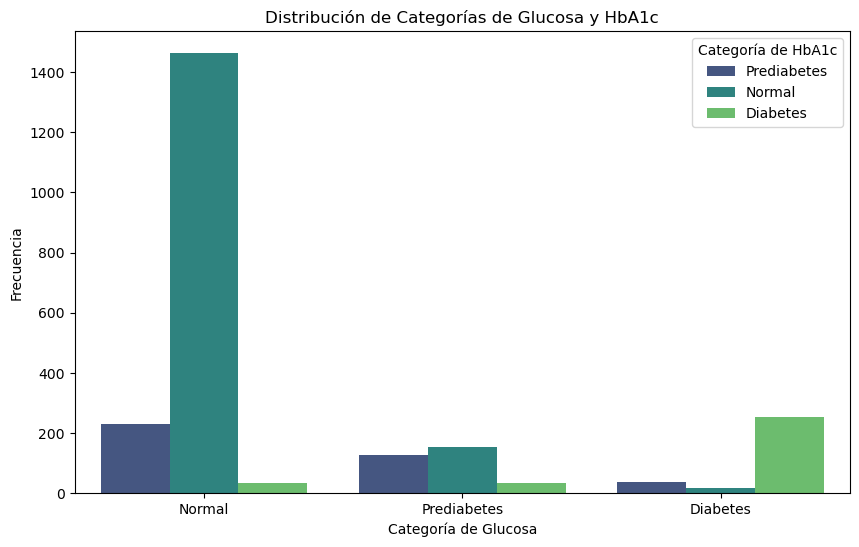

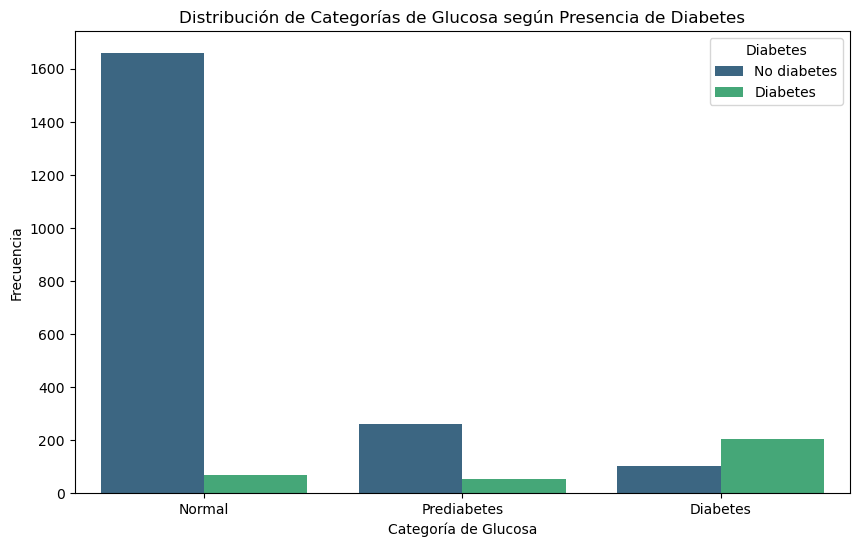

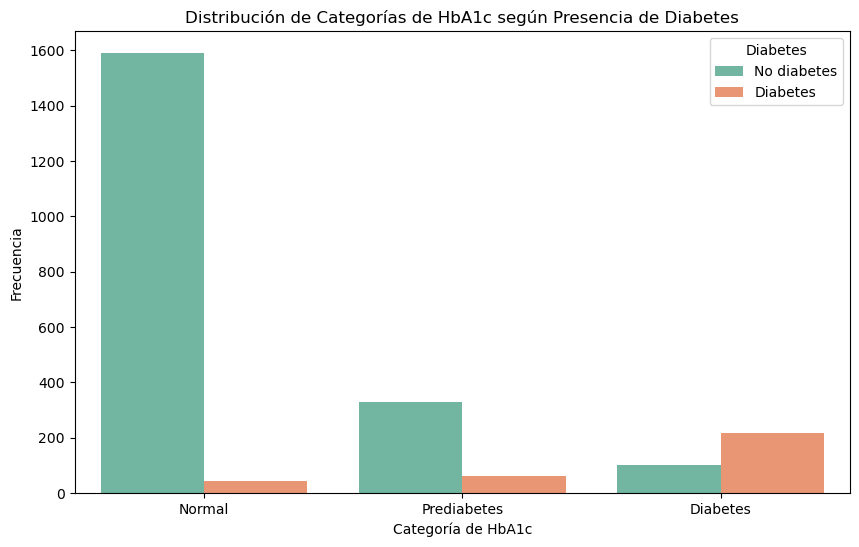

Correlación entre glucosa y HbA1c:
                  valor.GLU_SUERO  HB1AC.Valor
valor.GLU_SUERO         1.000000     0.857858
HB1AC.Valor             0.857858     1.000000


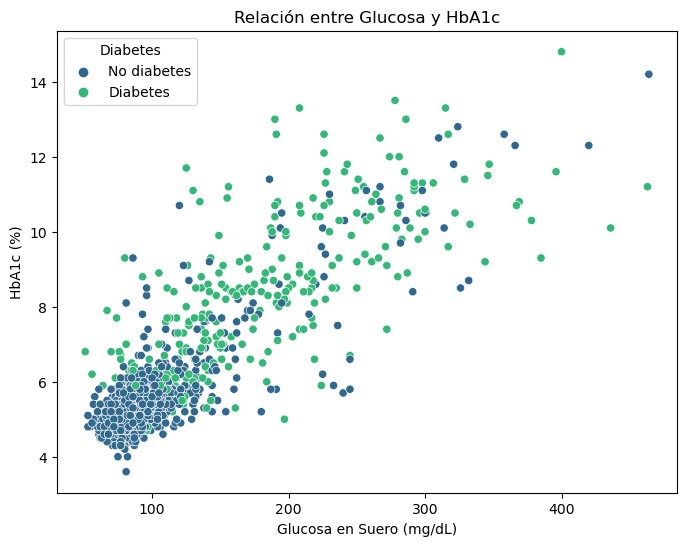

Media de glucosa por categoría de HbA1c:
 Categoria_HbA1c
Diabetes       192.102804
Normal          86.982252
Prediabetes    101.109694
Name: valor.GLU_SUERO, dtype: float64


/var/folders/lf/ggct99j94yg95npyf6tm4vvm0000gn/T/ipykernel_13898/1512937853.py:104: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_clean, x='Categoria_HbA1c', y='valor.GLU_SUERO', estimator=np.mean, ci='sd', palette='viridis')


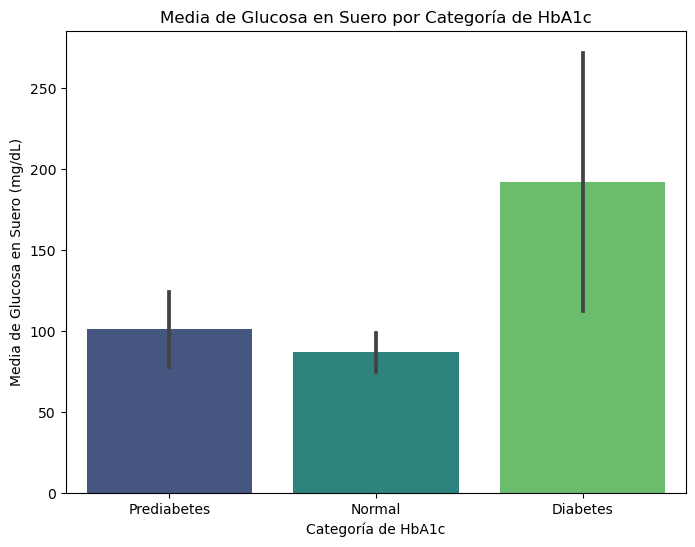

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer datos
df = pd.read_csv("ensanut2020.csv", encoding="latin", sep=";")
df.replace(",", ".", regex=True, inplace=True)
indices_mantener = [7,8,9,39,59,60,61,63,65,67,69,71,73,75,77,79,81,83,86,89,90,91,92]
df_clean = df.iloc[:, indices_mantener]

# Filtrar columnas relevantes y valores no nulos
df_clean = df_clean[['H0902A', 'valor.GLU_SUERO', 'HB1AC.Valor']].dropna()
df_clean.head(5)

# Asegurar que GLU_SUERO y HB1AC.Valor sean numéricos
df_clean['valor.GLU_SUERO'] = pd.to_numeric(df_clean['valor.GLU_SUERO'], errors='coerce')
df_clean = df_clean.dropna(subset=['valor.GLU_SUERO'])
df_clean['HB1AC.Valor'] = df_clean['HB1AC.Valor'].replace(",", ".", regex=True)
df_clean['HB1AC.Valor'] = pd.to_numeric(df_clean['HB1AC.Valor'], errors='coerce')

# Clasificar niveles de glucosa
def clasificar_glucosa(nivel):
    if nivel < 100:
        return 'Normal'
    elif 100 <= nivel < 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'

df_clean['Categoria_Glucosa'] = df_clean['valor.GLU_SUERO'].apply(clasificar_glucosa)

# Clasificar niveles de HbA1c
def clasificar_hba1c(nivel):
    if nivel < 5.7:
        return 'Normal'
    elif 5.7 <= nivel < 6.5:
        return 'Prediabetes'
    else:
        return 'Diabetes'

df_clean['Categoria_HbA1c'] = df_clean['HB1AC.Valor'].apply(clasificar_hba1c)

import numpy as np

# Crear una columna que indique si la persona tiene o no diabetes
df_clean['Diabetes'] = np.where(df_clean['H0902A'] == 1, 'Diabetes', 'No diabetes')

# Crear tablas de contingencia utilizando la columna 'Diabetes'
tabla_glucosa = pd.crosstab(df_clean['Diabetes'], df_clean['Categoria_Glucosa'])
print("Tabla de contingencia de la categoría de Glucosa y presencia de diabetes:\n", tabla_glucosa)

tabla_hba1c = pd.crosstab(df_clean['Diabetes'], df_clean['Categoria_HbA1c'])
print("\nTabla de contingencia de la categoría de HbA1c y presencia de diabetes:\n", tabla_hba1c)

# Visualización de la relación
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='Categoria_Glucosa', hue='Categoria_HbA1c', palette="viridis", order=['Normal', 'Prediabetes', 'Diabetes'])
plt.title('Distribución de Categorías de Glucosa y HbA1c')
plt.xlabel('Categoría de Glucosa')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría de HbA1c')
plt.show()


# Visualización de la relación entre categoría de glucosa y presencia de diabetes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Categoria_Glucosa', hue='Diabetes', palette="viridis", order=['Normal', 'Prediabetes', 'Diabetes'])
plt.title('Distribución de Categorías de Glucosa según Presencia de Diabetes')
plt.xlabel('Categoría de Glucosa')
plt.ylabel('Frecuencia')
plt.legend(title='Diabetes')
plt.show()

# Visualización de la relación entre categoría de HbA1c y presencia de diabetes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Categoria_HbA1c', hue='Diabetes', palette="Set2", order=['Normal', 'Prediabetes', 'Diabetes'])
plt.title('Distribución de Categorías de HbA1c según Presencia de Diabetes')
plt.xlabel('Categoría de HbA1c')
plt.ylabel('Frecuencia')
plt.legend(title='Diabetes')
plt.show()

# Calcular la correlación entre 'valor.GLU_SUERO' y 'HB1AC.Valor'
correlacion = df_clean[['valor.GLU_SUERO', 'HB1AC.Valor']].corr()

# Mostrar la correlación entre ambas variables
print("Correlación entre glucosa y HbA1c:\n", correlacion)

# Visualización 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='valor.GLU_SUERO', y='HB1AC.Valor', hue='Diabetes', palette="viridis")
plt.title('Relación entre Glucosa y HbA1c')
plt.xlabel('Glucosa en Suero (mg/dL)')
plt.ylabel('HbA1c (%)')
plt.legend(title='Diabetes')
plt.show()

# Calcular la media de glucosa para cada categoría de HbA1c
media_glucosa_por_hba1c = df_clean.groupby('Categoria_HbA1c')['valor.GLU_SUERO'].mean()
print("Media de glucosa por categoría de HbA1c:\n", media_glucosa_por_hba1c)

plt.figure(figsize=(8, 6))
sns.barplot(data=df_clean, x='Categoria_HbA1c', y='valor.GLU_SUERO', estimator=np.mean, ci='sd', palette='viridis')
plt.title('Media de Glucosa en Suero por Categoría de HbA1c')
plt.xlabel('Categoría de HbA1c')
plt.ylabel('Media de Glucosa en Suero (mg/dL)')
plt.show()